# Improving the Model: Image Augmentation, Batch Size(Sweet Spot), Regularization
---

#### Targets:
Improve the model learning by:

  i) Adding image augmentation

  ii) Reducing batch size

  iii) Adding regularization at correct position with reduced batch size

#### Results:
  - Best Train Accuracy - 98.55%
  - Best Test Accuracy - 99.42%
  - Total Parameters - 8000

#### Analysis:
  i) Adding image augmentation of scaling, translation and rotation increased the difficulty of model's training so we see an improvement in the test accuracy

  ii) Reducing batch size from 512 to 128 improved the generalization capability of the model on the test dataset and brought the test accuracy in the 99.4% threshold. 128 batch size is the sweet spot for this model, below which the test accuracy degrades. This is due to the existence to “noise” in small batch size training. Because neural network systems are extremely prone to overfitting, upon seeing many small batch size, each batch being a “noisy” representation of the entire dataset, will cause a sort of “tug-and-pull” dynamic. This “tug-and-pull” dynamic prevents the neural network from overfitting on the training set and hence performing badly on the test set.

  iii) Adding STEP LR at correct position of 8 epochs instead of 4. This helped in reducing the epochs for achieving 99.% test accuracy consistently.

  With the above experimentation, I was able to achieve 99.4% test accuracy consistently.

In [ ]:
!git clone https://github.com/garima-mahato/ERA_V3.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 152 (delta 68), reused 78 (delta 21), pack-reused 0
Receiving objects: 100% (152/152), 2.40 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
from ERA_V3.Session7 import *

In [ ]:

# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


## Model Architecture

In [ ]:
!pip install torchsummary
from torchsummary import summary

model = Model_7().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 14, 24, 24]           1,008
              ReLU-6           [-1, 14, 24, 24]               0
       BatchNorm2d-7           [-1, 14, 24, 24]              28
           Dropout-8           [-1, 14, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             140
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
    

## Dataset Creation

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

# set seed
torch.manual_seed(1)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 140164895.30it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18378955.22it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36986145.47it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21357095.03it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Data Visualization

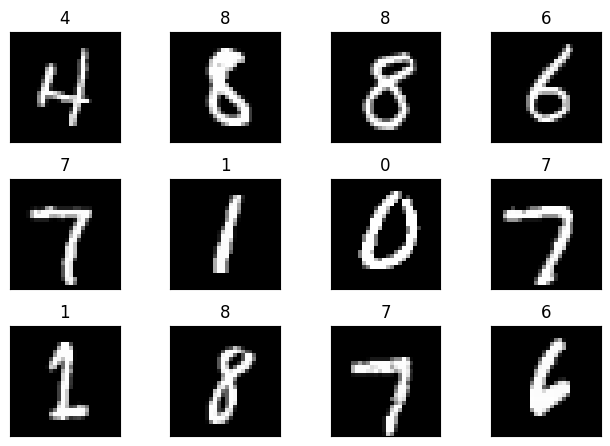

In [ ]:
view_data(train_loader)

## Model Training and Testing

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0786 Batch_id=468 Accuracy=87.56: 100%|██████████| 469/469 [00:33<00:00, 14.01it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0528, Accuracy: 9831/10000 (98.31%)

Epoch 2


Train: Loss=0.1295 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0507, Accuracy: 9841/10000 (98.41%)

Epoch 3


Train: Loss=0.1093 Batch_id=468 Accuracy=97.08: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0531, Accuracy: 9841/10000 (98.41%)

Epoch 4


Train: Loss=0.1115 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0295, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Loss=0.0523 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:26<00:00, 17.98it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0334, Accuracy: 9895/10000 (98.95%)

Epoch 6


Train: Loss=0.0316 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:25<00:00, 18.20it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0367, Accuracy: 9884/10000 (98.84%)

Epoch 7


Train: Loss=0.0307 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:26<00:00, 17.84it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0242, Accuracy: 9919/10000 (99.19%)

Epoch 8


Train: Loss=0.0396 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0372, Accuracy: 9878/10000 (98.78%)

Epoch 9


Train: Loss=0.0392 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:26<00:00, 17.79it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0190, Accuracy: 9936/10000 (99.36%)

Epoch 10


Train: Loss=0.0800 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:26<00:00, 17.44it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0186, Accuracy: 9942/10000 (99.42%)

Epoch 11


Train: Loss=0.0219 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:26<00:00, 17.87it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

Epoch 12


Train: Loss=0.0387 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0182, Accuracy: 9940/10000 (99.40%)

Epoch 13


Train: Loss=0.0534 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:26<00:00, 18.03it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0186, Accuracy: 9940/10000 (99.40%)

Epoch 14


Train: Loss=0.0075 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:26<00:00, 17.68it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0184, Accuracy: 9941/10000 (99.41%)

Epoch 15


Train: Loss=0.0594 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:26<00:00, 17.49it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0183, Accuracy: 9942/10000 (99.42%)



### Accuracy/Loss Visualization

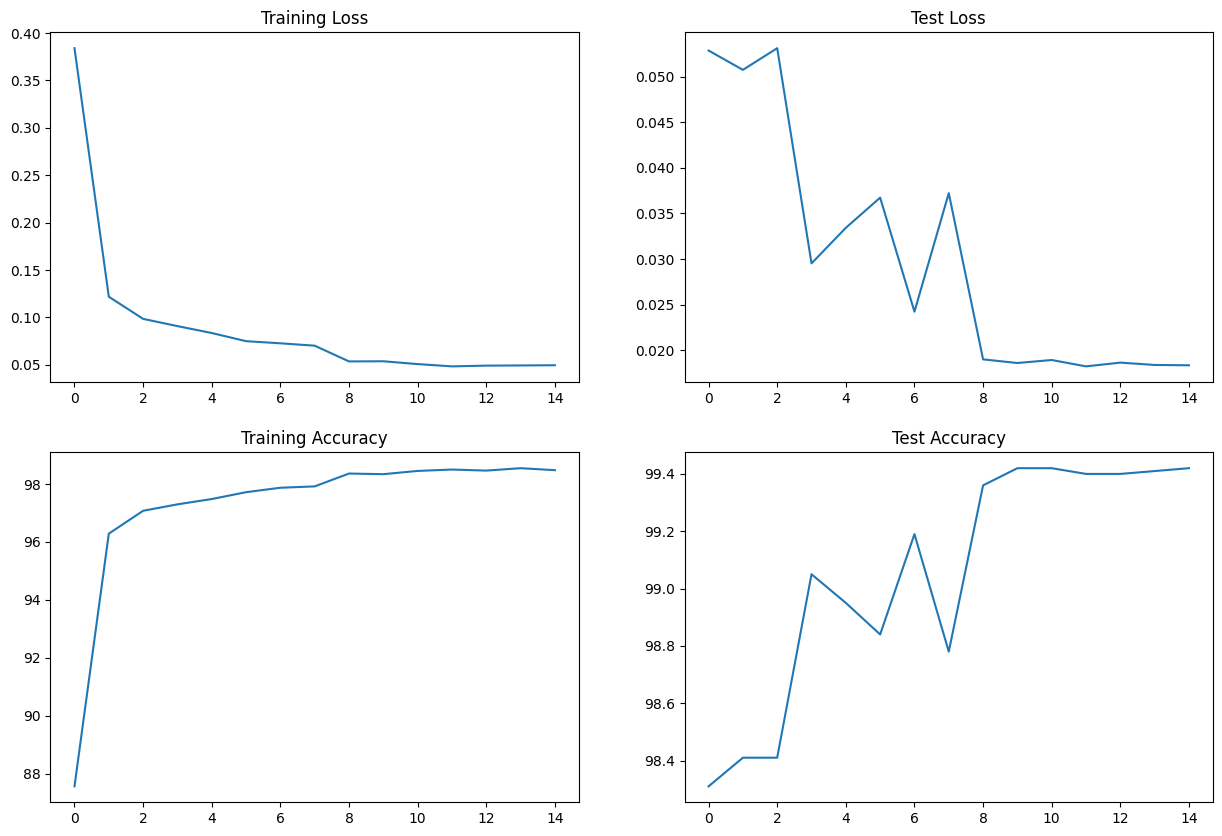

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)